<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="http://cocl.us/DA0101EN_NotbookLink_Top">
         <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/TopAd.png" width="750" align="center">
    </a>
</div>


<a href="https://www.bigdatauniversity.com"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/CCLog.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>Data Analysis with Python</font></h1>

Exploratory Data Analysis

<h3>Welcome!</h3>
In this section, we will explore several methods to see if certain characteristics or features can be used to predict car price. 

<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#import_data">Import Data from Module</a></li>
    <li><a href="#pattern_visualization">Analyzing Individual Feature Patterns using Visualization</a></li>
    <li><a href="#discriptive_statistics">Descriptive Statistical Analysis</a></li>
    <li><a href="#basic_grouping">Basics of Grouping</a></li>
    <li><a href="#correlation_causation">Correlation and Causation</a></li>
    <li><a href="#anova">ANOVA</a></li>
</ol>
    
Estimated Time Needed: <strong>30 min</strong>
</div>
 
<hr>

<h3>What are the main characteristics which have the most impact on the car price?</h3>

<h2 id="import_data">1. Import Data from Module 2</h2>

<h4>Setup</h4>

 Import libraries 

In [1]:
import pandas as pd
import numpy as np

 load data and store in dataframe df:

This dataset was hosted on IBM Cloud object click <a href="https://cocl.us/cognitive_class_DA0101EN_objectstorage">HERE</a> for free storage

In [2]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns using Visualization</h2>

To install seaborn we use the pip which is the python package manager.

In [3]:
# %%capture
# ! pip install seaborn

 Import visualization packages "Matplotlib" and "Seaborn", don't forget about "%matplotlib inline" to plot in a Jupyter notebook.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [5]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Question  #1:</h3>

<b>What is the data type of the column "peak-rpm"? </b>
</div>

Double-click <b>here</b> for the solution.

<!-- The answer is below:

float64

-->

for example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":

In [6]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [7]:
df.describe().columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'diesel', 'gas'],
      dtype='object')

In [132]:
x=df.loc[::,df.describe().columns]
x.drop(columns='price',inplace=True)
x.fillna(0,inplace=True)
y=df.price

In [9]:
from sklearn.feature_selection import chi2,SelectKBest

In [142]:
x=x.iloc[:,1:]

In [145]:
model=SelectKBest(score_func= chi2, k=6)
fit=model.fit(x,y)
fit

SelectKBest(k=6, score_func=<function chi2 at 0x000001E73A580C80>)

In [147]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                Specs         Score
5         curb-weight  20891.811269
11           peak-rpm   8790.592756
6         engine-size   2715.181888
10         horsepower   2685.369819
0   normalized-losses   1653.819672
12           city-mpg    324.914345
13        highway-mpg    299.390078
9   compression-ratio    297.467217
15             diesel    170.950000
14       city-L/100km    128.623289


In [129]:
plt.figure(figsize=(10,10))
# sns.heatmap(df.loc[:,df.describe().columns].corr())
df.loc[:,df.describe().columns].corr().price.nlargest(8)

price           1.000000
engine-size     0.872335
curb-weight     0.834415
horsepower      0.809575
city-L/100km    0.789898
width           0.751265
length          0.690628
wheel-base      0.584642
Name: price, dtype: float64

<Figure size 720x720 with 0 Axes>

C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.04238492 0.08447015 0.04787991 0.05454505 0.0379546  0.07277544
 0.23711943 0.04374625 0.05299386 0.03735119 0.03380991 0.05366079
 0.0342694  0.06003398 0.05272679 0.04532932 0.00425288 0.00469612]


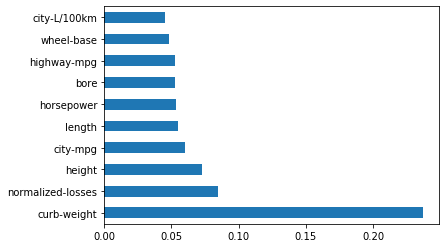

In [130]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The diagonal elements are always one; we will study correlation more precisely Pearson correlation in-depth at the end of the notebook.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<p>Find the correlation between the following columns: bore, stroke,compression-ratio , and horsepower.</p>
<p>Hint: if you would like to select those columns  use the following syntax: df[['bore','stroke' ,'compression-ratio','horsepower']]</p>
</div>

In [ ]:
# Write your code below and press Shift+Enter to execute 
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

In [12]:
df[['engine-size','price' ]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Double-click <b>here</b> for the solution.

<!-- The answer is below:

df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()  

-->

<h2>Continuous numerical variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>

 Let's see several examples of different linear relationships:

<h4>Positive linear relationship</h4>

Let's find the scatterplot of "engine-size" and "price" 

(0, 55913.99264731411)

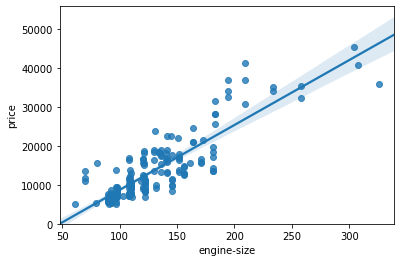

In [13]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df,fit_reg=True)
plt.ylim(0,)

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>

 We can examine the correlation between 'engine-size' and 'price' and see it's approximately  0.87

In [14]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway mpg is a potential predictor variable of price 

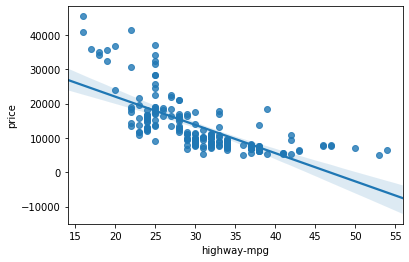

In [15]:
sns.regplot(x="highway-mpg", y="price", data=df)

<p>As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>

We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately  -0.704

In [16]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<h3>Weak Linear Relationship</h3>

Let's see if "Peak-rpm" as a predictor variable of "price".

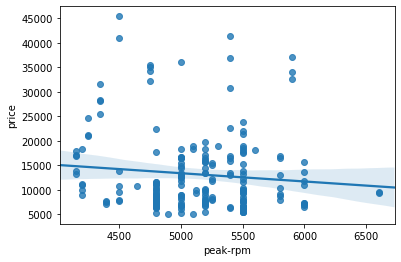

In [17]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.</p>

We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616 

In [18]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 a): </h1>

<p>Find the correlation  between x="stroke", y="price".</p>
<p>Hint: if you would like to select those columns  use the following syntax: df[["stroke","price"]]  </p>
</div>

In [19]:
# Write your code below and press Shift+Enter to execute

df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


Double-click <b>here</b> for the solution.

<!-- The answer is below:

#The correlation is 0.0823, the non-diagonal elements of the table.
#code:
df[["stroke","price"]].corr() 

-->

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  3 b):</h1>

<p>Given the correlation results between "price" and "stroke" do you expect a linear relationship?</p> 
<p>Verify your results using the function "regplot()".</p>
</div>

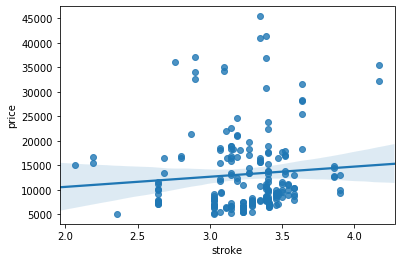

In [20]:
# Write your code below and press Shift+Enter to execute 
sns.regplot(x="stroke", y="price", data=df,fit_reg=True)

Double-click <b>here</b> for the solution.

<!-- The answer is below:

#There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well.  We #can see this use "regplot" to demonstrate this.

#Code: 
sns.regplot(x="stroke", y="price", data=df)

-->

<h3>Categorical variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

Let's look at the relationship between "body-style" and "price".

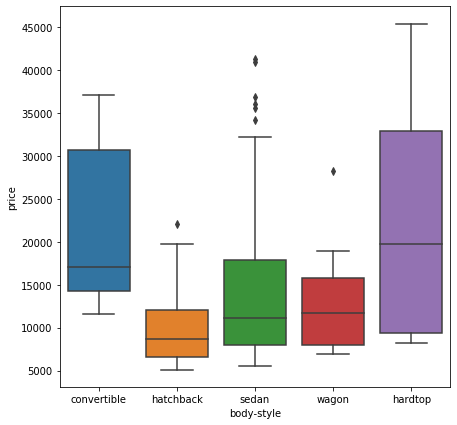

In [21]:
plt.figure(figsize=(7,7))
sns.boxplot(x="body-style", y="price", data=df)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":</p>

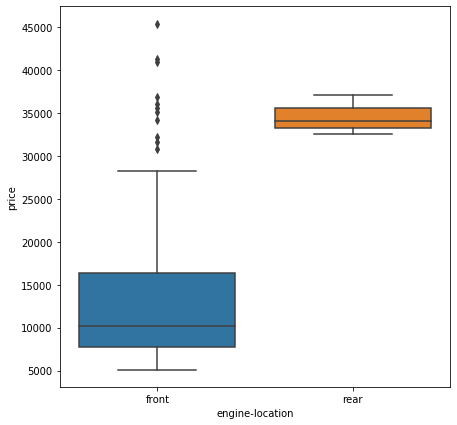

In [22]:
plt.figure(figsize=(7,7))
sns.boxplot(x="engine-location", y="price", data=df)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>

 Let's examine "drive-wheels" and "price".

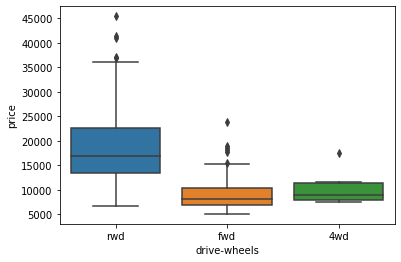

In [23]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.</p>

<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>

<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


 We can apply the method "describe" as follows:

In [24]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


 The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [25]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [26]:
df.describe(percentiles=[.01,.99])

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
1%,-2.000000,65.00000,88.400000,0.694858,0.868056,48.800000,1819.000000,70.000000,2.910000,2.190000,7.000000,52.000000,4150.000000,14.000000,17.000000,5195.000000,5.222222,0.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
99%,3.000000,197.00000,115.600000,0.973570,0.995833,59.100000,3950.000000,304.000000,3.800000,3.910800,23.000000,207.000000,6000.000000,45.000000,50.000000,40960.000000,16.785714,1.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


<h3>Value Counts</h3>

<p>Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'drive-wheels'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".</p>

In [27]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [28]:
df.describe().columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'diesel', 'gas'],
      dtype='object')

In [29]:
col_ob=df.describe(include='object').columns.tolist()
df[['make','num-of-doors','horsepower']].melt(id_vars=['make'],value_vars=['num-of-doors','horsepower'])

,make,variable,value
0,alfa-romero,num-of-doors,two
1,alfa-romero,num-of-doors,two
2,alfa-romero,num-of-doors,two
3,audi,num-of-doors,four
4,audi,num-of-doors,four
5,audi,num-of-doors,two
6,audi,num-of-doors,four
7,audi,num-of-doors,four
8,audi,num-of-doors,four
9,bmw,num-of-doors,two


We can convert the series to a Dataframe as follows :

In [30]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column  'drive-wheels' to 'value_counts'.

In [31]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


 Now let's rename the index to 'drive-wheels':

In [32]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


We can repeat the above process for the variable 'engine-location'.

In [33]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


<p>Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>

<h2 id="basic_grouping">4. Basics of Grouping</h2>

<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.</p>

In [34]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>

<p>We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".</p>

We can then calculate the average price for each of the different categories of data.

In [35]:
df_group_one = df[['drive-wheels','body-style','price']]

In [36]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [37]:
df_group_one.groupby(['drive-wheels']).mean()

,price
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19757.613333


In [38]:
df_group_one = df[['drive-wheels','body-style','price']]

In [39]:
df_group_one.pivot_table(values='price',index='drive-wheels',columns='body-style',
                         aggfunc='mean',fill_value=0)

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,0.0,0.000000,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

<p>You can also group with multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.</p>

In [40]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.</p>

<p>In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:</p>

In [41]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>

In [42]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "price" of each car based on "body-style" ? </p>
</div>

In [43]:
pd.options.display.max_columns=50

In [44]:
# Write your code below and press Shift+Enter to execute 
grouped_test_bodystyle=df[['body-style','make','price']].groupby(['body-style','make'],as_index=False).mean()
test2=grouped_test_bodystyle.pivot(index='body-style',columns='make').fillna(0)
print(test2.idxmax())
test2

       make         
price  alfa-romero        hatchback
       audi                   wagon
       bmw                    sedan
       chevrolet              sedan
       dodge                  wagon
       honda                  sedan
       isuzu              hatchback
       jaguar                 sedan
       mazda                  sedan
       mercedes-benz        hardtop
       mercury            hatchback
       mitsubishi         hatchback
       nissan             hatchback
       peugot                 sedan
       plymouth               wagon
       porsche          convertible
       renault            hatchback
       saab                   sedan
       subaru                 wagon
       toyota           convertible
       volkswagen             wagon
       volvo                  sedan
dtype: object


price                                            \
make        alfa-romero     audi       bmw chevrolet        dodge   
body-style                                                          
convertible     14997.5      0.0      0.00       0.0     0.000000   
hardtop             0.0      0.0      0.00       0.0     0.000000   
hatchback       16500.0      0.0      0.00    5723.0  7819.800000   
sedan               0.0  17647.0  26118.75    6575.0  7619.666667   
wagon               0.0  18920.0      0.00       0.0  8921.000000   

                                                                        \
make               honda    isuzu   jaguar         mazda mercedes-benz   
body-style                                                               
convertible     0.000000      0.0      0.0      0.000000       35056.0   
hardtop         0.000000      0.0      0.0      0.000000       36788.0   
hatchback    7054.428571  11048.0      0.0  10085.000000           0.0   
sedan        9945.000000   6785.0  34600.0  11464.142857       33074.0   
wagon        7295.000000      0.0      0.0      0.000000       28248.0   

                                                                        \
make         mercury   mitsubishi        nissan        peugot plymouth   
body-style                                                               
convertible      0.0     0.000000      0.000000      0.000000      0.0   
hardtop          0.0     0.000000   8249.000000      0.000000      0.0   
hatchback    16503.0  9597.888889  14409.000000      0.000000   8130.5   
sedan            0.0  8434.000000   8604.555556  15758.571429   7150.5   
wagon            0.0     0.000000   9915.666667  15017.500000   8921.0   

                                                                       \
make         porsche renault          saab       subaru        toyota   
body-style                                                              
convertible  37028.0     0.0      0.000000     0.000000  17669.000000   
hardtop      33278.0     0.0      0.000000     0.000000   9762.333333   
hatchback    22018.0  9895.0  15013.333333  6591.333333   9616.000000   
sedan            0.0     0.0  15433.333333  9070.600000   9542.200000   
wagon            0.0  9295.0      0.000000  9342.000000   9836.000000   

                                         
make           volkswagen         volvo  
body-style                               
convertible  11595.000000      0.000000  
hardtop          0.000000      0.000000  
hatchback     9980.000000      0.000000  
sedan         9673.888889  18726.875000  
wagon        12290.000000  16293.333333

Double-click <b>here</b> for the solution.

<!-- The answer is below:

# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

-->

If you did not import "pyplot" let's do it again. 

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4>Variables: Drive Wheels and Body Style vs Price</h4>

Let's use a heat map to visualize the relationship between Body Style vs Price.

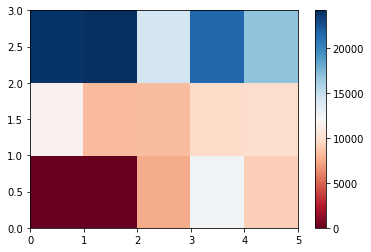

In [46]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

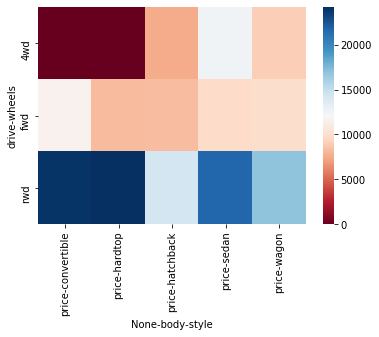

In [47]:
import seaborn as sns
sns.heatmap(grouped_pivot,cmap='RdBu',annot=False)

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>

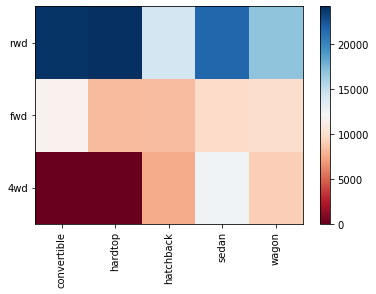

In [48]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python Visualizations course.</p>

<p>The main question we want to answer in this module, is "What are the main characteristics which have the most impact on the car price?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the car price, in other words: how is the car price dependent on this variable?</p>

<h2 id="correlation_causation">5. Correlation and Causation</h2>

#  Pruebas de correlación

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p3>Pearson Correlation</p> NO variables ordinales  
The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

<p>Pearson Correlation is the default method of the function "corr".  Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>  
Pearson r correlation is the most widely used correlation statistic to measure the degree of the relationship between linearly related variables.  For example, in the stock market, if we want to measure how two stocks are related to each other, Pearson r correlation is used to measure the degree of relationship between the two.  
Is there a statistically significant relationship between age, as measured in years, and height, measured in inches?  

Is there a relationship between temperature, measured in degrees Fahrenheit, and ice cream sales, measured by income?  

Is there a relationship between job satisfaction, as measured by the JSS, and income, measured in dollars  

 sometimes we would like to know the significant of the correlation estimate. 

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the.001$<$ p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the .05 $<$p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>  
H0: the two samples are independent.  
H1: there is a dependency between the samples.

 We can obtain this information using  "stats" module in the "scipy"  library.

In [49]:
from scipy import stats

<h3>Wheel-base vs Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'. 

In [50]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732989e-20


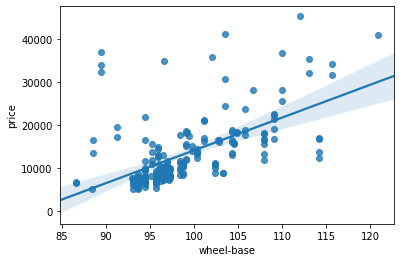

In [51]:
sns.regplot(df['wheel-base'], df['price'])

<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)</p>

<h3>Horsepower vs Price</h3>

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [52]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.809574567003656  with a P-value of P =  6.369057428259557e-48


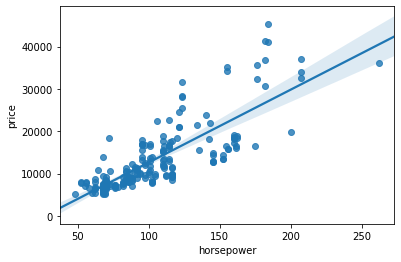

In [53]:
sns.regplot(df['horsepower'], df['price'])

<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)</p>

<h3>Length vs Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.

In [54]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466158986e-30


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>

<h3>Width vs Price</h3>

 Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':

In [55]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522672  with a P-value of P = 9.20033551048217e-38


##### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

### Curb-weight vs Price

 Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':

In [56]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702844  with a P-value of P =  2.189577238893878e-53


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>

<h3>Engine-size vs Price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':

In [57]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455182  with a P-value of P = 9.265491622200232e-64


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>

<h3>Bore vs Price</h3>

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':

In [58]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P =   8.049189483935261e-17


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>

 We can relate the process for each 'City-mpg'  and 'Highway-mpg':

<h3>City-mpg vs Price</h3>

In [59]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.321132065567674e-29


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.</p>

<h3>Highway-mpg vs Price</h3>

In [60]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P =  1.7495471144477352e-31


##### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

###  Continuacion pruebas de correlacion

Spearman   
Calculate a Spearman rank-order correlation coefficient and the p-value to test for non-correlation.   

Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables.  

Further, the two variables being considered may have a non-Gaussian distribution.  

In this case, the Spearman’s correlation coefficient (named for Charles Spearman) can be used to summarize the strength between the two data samples. This test of relationship can also be used if there is a linear relationship between the variables, but will have slightly less power   
The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.  
Spearman rank correlation is a non-parametric test that is used to measure the degree of association between two variables.  The Spearman rank correlation test does not carry any assumptions about the distribution of the data and is the appropriate correlation analysis when the variables are measured on a scale that is at least ordinal.  

Is there a statistically significant relationship between participants’ level of education (high school, bachelor’s, or graduate degree) and their starting salary?  

Is there a statistically significant relationship between horse’s finishing position a race and horse’s age?   
p-value for a hypothesis test whose null hypothesis is that two sets of data are uncorrelated  

stats.spearmanr()  
 
H0: the two samples are independent.  
H1: there is a dependency between the samples.

In [61]:
x=np.arange(0,100,1)
y=np.random.randn(100, 2)
rho,p=stats.spearmanr(x,y)

In [62]:
stats.spearmanr(y)

SpearmanrResult(correlation=-0.18097809780978094, pvalue=0.0715551250433945)

In [63]:
rho

array([[ 1.        , -0.12655266,  0.04842484],
       [-0.12655266,  1.        , -0.1809781 ],
       [ 0.04842484, -0.1809781 ,  1.        ]])

In [64]:
p

array([[0.        , 0.20959964, 0.63233631],
       [0.20959964, 0.        , 0.07155513],
       [0.63233631, 0.07155513, 0.        ]])

 Kendall's tau coefficient, is a statistic used to measure the ordinal association between two measured quantities.  
 The Kendall rank coefficient is often used as a test statistic in a statistical hypothesis test to establish whether two variables may be regarded as statistically dependent.  
 Under the null hypothesis of independence of X and Y, the sampling distribution of τ has an expected value of zero.   


In [65]:
x = [12, 2, 1, 12, 2]
y = [1, 4, 7, 1, 0]
stats.kendalltau(x,y)

KendalltauResult(correlation=-0.4714045207910316, pvalue=0.2827454599327748)

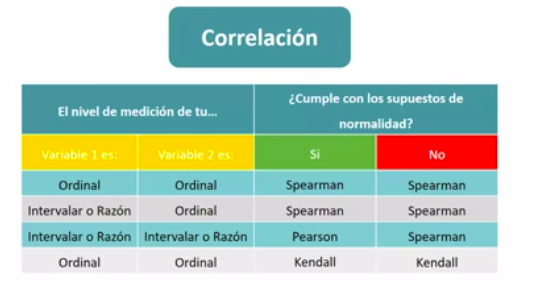

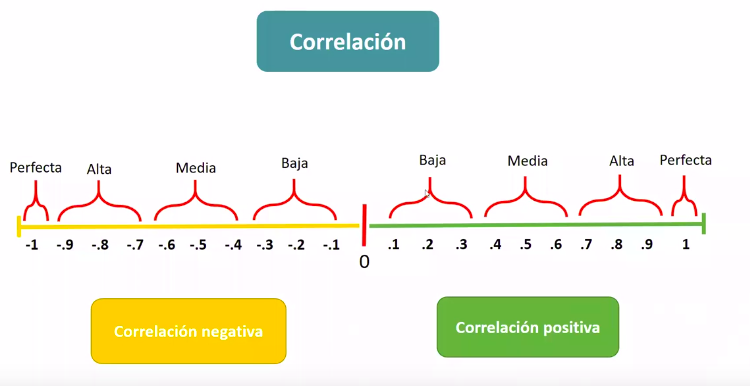

## Ji-cuadrada  
H0: the two samples are independent.  
H1: there is a dependency between the samples.  

Tests whether two categorical variables are related or independent.  

In [66]:
obs = np.array([[10, 10, 20], [20, 20, 20]])
stats.chi2_contingency(obs)[1] # NO se rechaza que sean independientes

0.24935220877729622

<h2 id="anova">6. ANOVA</h2>

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>  
Variacion entre las medias de los grupos, alto F-test score significa alta correlacion entre la variable objetivo y la variable de categorias. Tambien implica que las diferencia de medias es grande, por lo tanto se rechaza la hipotesis nula.

Si F-test es pequeño,entonces la correlacion entre la variable objetivo y el grouping es debil, F-test pequeño, entonces no se rechaza la hipótesis, es decir, se rechaza a favor de que las medias sean iguales

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>  


<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>  
Observations in each sample are independent and identically distributed (iid).  
Observations in each sample are normally distributed.  
Observations in each sample have the same variance.  

<h3>Drive Wheels</h3>

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>Let's see if different types 'drive-wheels' impact  'price', we group the data.</p>

 Let's see if different types 'drive-wheels' impact  'price', we group the data.

In [67]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [68]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
5,fwd,sedan,15250.0
6,fwd,sedan,17710.0
7,fwd,wagon,18920.0
8,fwd,sedan,23875.0
9,rwd,sedan,16430.0


 We can obtain the values of the method group using the method "get_group".  

In [69]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

we can use the function 'f_oneway' in the module 'stats'  to obtain the <b>F-test score</b> and <b>P-value</b>.

In [70]:
# ANOVA
#si pvalue< alpha se rechaza H0
import scipy.stats as stats
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

#### Separately: fwd and rwd

In [71]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )
#T test score grande implica que la diferencia de medias es grande, lo cual conlleva a que
#se rechace H0 la cual supone que las medias de los grupos son iguales

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


 Let's examine the other groups 

#### 4wd and rwd

In [72]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


<h4>4wd and fwd</h4>

In [73]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   
#F-test score pequeño implica que la diferencia de medias es pequeña

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


<h3>Conclusion: Important Variables</h3>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

In [74]:
test3=df[['make','price']].groupby('make')
make=test3.describe().index.tolist()
a=[test3.get_group(x)['price'] for x in make]

In [75]:
stats.f_oneway(a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11],
                a[12],a[13],a[14],a[15],a[16],a[17],a[18],a[19],a[20],a[21])

F_onewayResult(statistic=33.23210250666057, pvalue=1.068342528777401e-50)

In [76]:
test3=df[['num-of-doors','price']].groupby('num-of-doors')
stats.f_oneway(test3.get_group('two')['price'],test3.get_group('four')['price'])

F_onewayResult(statistic=0.3589973711707057, pvalue=0.5497450927348373)

In [77]:
test3=df[['body-style','price']].groupby('body-style')
stats.f_oneway(test3.get_group('convertible')['price'],test3.get_group('hatchback')['price'],
              test3.get_group('sedan')['price'],test3.get_group('hardtop')['price'],
              test3.get_group('wagon')['price'])

F_onewayResult(statistic=9.12875185470821, pvalue=8.779795237614595e-07)

In [78]:
test3=df[['engine-location','price']].groupby('engine-location')
stats.f_oneway(test3.get_group('front')['price'],test3.get_group('rear')['price'])

F_onewayResult(statistic=24.495550318865693, pvalue=1.583490019777699e-06)

In [79]:
df['engine-location'].unique()

array(['front', 'rear'], dtype=object)

##  T-test

The independent t-test is also called the two sample t-test, student’s t-test, or unpaired t-test. It’s an univariate test that tests for a significant difference between the mean of two independent (unrelated) groups.    
No pareados- comparar en poblacines   
To determine if there is a significant difference between two groups one must set a p-value before hand; if the test produces a p-value which is less than the set p-value then the test is said to be significant and that there is a significant difference between the two means. This means one rejects the null hypothesis in support of the alternative  
Assumptions  
The samples are independently and randomly drawn  
The distribution of the residuals between the two groups should follow the normal distribution  
The variances between the two groups are equal   
H0: the means of the samples are equal.  
H1: the means of the samples are unequal.



###  Prueba de varianzas 

Homogeneidad de las varianzas de distintos grupos, H0 todos los grupos tienen la misma varianza, si p value < $\alpha$ se rechaza que tengan las mismas varianzas

In [80]:
stats.levene(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])
#Se rechaza que tengan varianzas iguales los grupos

LeveneResult(statistic=34.967225477422076, pvalue=1.5200636303383106e-08)

###  Prueba de normalidad  
 The residuals needs to be normally distributed. To calculate the residuals between the groups, subtract the values of one group from the values of the other group.  
 Shapiro-Wilk test to formally test for normality, H0 la informacion viene de una distribucion normal  
 stats.shapiro(diff)   

For visualization of normality    
  
from scipy import stats  
import matplotlib.pyplot as plt  
stats.probplot(diff, plot= plt)  
plt.title('Sepal Width P-P Plot')   
plt.savefig('Sepal Width Residuals.png') 
  
the dots should fall on the red line. If the dots are not on the red line then it’s an indication that there is deviation from normality. Some deviations from normality is fine, as long as it’s not severe.  
O mediante un histograma

In [81]:
# diff= grouped_test2.get_group('fwd')['price']- grouped_test2.get_group('rwd')['price']
stats.shapiro(grouped_test2.get_group('rwd')['price'])

(0.8908505439758301, 9.29548878048081e-06)

In [82]:
help(stats.shapiro)

Help on function shapiro in module scipy.stats.morestats:

shapiro(x)
    Perform the Shapiro-Wilk test for normality.
    
    The Shapiro-Wilk test tests the null hypothesis that the
    data was drawn from a normal distribution.
    
    Parameters
    ----------
    x : array_like
        Array of sample data.
    
    Returns
    -------
    W : float
        The test statistic.
    p-value : float
        The p-value for the hypothesis test.
    
    See Also
    --------
    anderson : The Anderson-Darling test for normality
    kstest : The Kolmogorov-Smirnov test for goodness of fit.
    
    Notes
    -----
    The algorithm used is described in [4]_ but censoring parameters as
    described are not implemented. For N > 5000 the W test statistic is accurate
    but the p-value may not be.
    
    The chance of rejecting the null hypothesis when it is true is close to 5%
    regardless of sample size.
    
    References
    ----------
    .. [1] https://www.itl.nist.gov/div8

Anderson Darling   
 The Anderson-Darling tests the null hypothesis that a sample is
    drawn from a population that follows a particular distribution.
    For the Anderson-Darling test, the critical values depend on
    which distribution is being tested against.  This function works
    for normal, exponential, logistic, or Gumbel (Extreme Value
    Type I) distributions.  
     Critical values provided are for the following significance levels:  
       
    normal/exponenential  
        15%, 10%, 5%, 2.5%, 1%  
    logistic  
        25%, 10%, 5%, 2.5%, 1%, 0.5%  
    Gumbel  
        25%, 10%, 5%, 2.5%, 1% 
      
    If the returned statistic is larger than these critical values then
    for the corresponding significance level, the null hypothesis that
    the data come from the chosen distribution can be rejected.

In [83]:
help(stats.anderson)

Help on function anderson in module scipy.stats.morestats:

anderson(x, dist='norm')
    Anderson-Darling test for data coming from a particular distribution
    
    The Anderson-Darling tests the null hypothesis that a sample is
    drawn from a population that follows a particular distribution.
    For the Anderson-Darling test, the critical values depend on
    which distribution is being tested against.  This function works
    for normal, exponential, logistic, or Gumbel (Extreme Value
    Type I) distributions.
    
    Parameters
    ----------
    x : array_like
        array of sample data
    dist : {'norm','expon','logistic','gumbel','gumbel_l', gumbel_r',
        'extreme1'}, optional
        the type of distribution to test against.  The default is 'norm'
        and 'extreme1', 'gumbel_l' and 'gumbel' are synonyms.
    
    Returns
    -------
    statistic : float
        The Anderson-Darling test statistic
    critical_values : list
        The critical values for this

In [84]:
stats.anderson(grouped_test2.get_group('4wd')['price'],dist='norm')
#se rechaza que proviene de una normal porque el estadistico es mayor que el critical value

AndersonResult(statistic=0.6972838374625745, critical_values=array([0.519, 0.591, 0.709, 0.827, 0.984]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Text(0.5, 1.0, '4wd price P-P Plot')

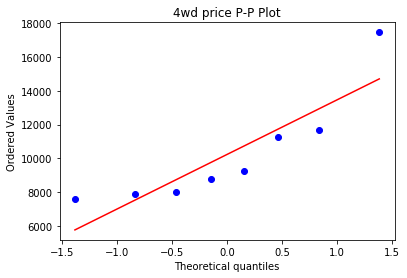

In [85]:
import matplotlib.pyplot as plt  
stats.probplot(grouped_test2.get_group('4wd')['price'], plot= plt)  
plt.title('4wd price P-P Plot')
# grouped_test2.get_group('4wd')['price'].hist()

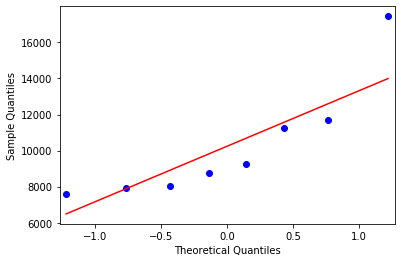

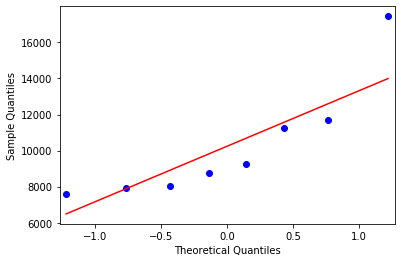

In [86]:
from statsmodels.graphics.gofplots import qqplot
qqplot(grouped_test2.get_group('4wd')['price'], line='s')

D’Agostino’s K^2 Test  

In [87]:
stats.normaltest(grouped_test2.get_group('4wd')['price'])
#Se rechaza que sea normal

C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=9.019548343608985, pvalue=0.011000944218694641)

Kolmogorov Smirnoff test  
This performs a test of the distribution F(x) of an observed random variable against a given distribution G(x). Under the null hypothesis the two distributions are identical, F(x)=G(x). The alternative hypothesis can be either ‘two-sided’ (default), ‘less’ or ‘greater’. The KS test is only valid for continuous distributions.  

In the one-sided test, the alternative is that the empirical cumulative distribution function of the random variable is “less” or “greater” than the cumulative distribution function G(x) of the hypothesis, F(x)<=G(x), resp. F(x)>=G(x).

In [88]:
stats.kstest(grouped_test2.get_group('4wd')['price'],'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [89]:
#T-test
stats.ttest_ind(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])

Ttest_indResult(statistic=-11.425993002619556, pvalue=2.2355306355677783e-23)

Paired Student’s t-test  
Pareado- antes y despues de un tratamiento  
Tests whether the means of two paired samples are significantly different.

Assumptions
 
Observations in each sample are independent and identically distributed (iid).  
Observations in each sample are normally distributed.  
Observations in each sample have the same variance.  
Observations across each sample are paired.  
Interpretation

H0: the means of the samples are equal.  
H1: the means of the samples are unequal.  

 Small p-values are associated with large t-statistics. 
 
 stats.ttest_rel?

In [90]:
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = (stats.norm.rvs(loc=5,scale=10,size=500) +
        stats.norm.rvs(scale=0.2,size=500))
stats.ttest_rel(rvs1,rvs2)

Ttest_relResult(statistic=0.7349125827853648, pvalue=0.4627379668892432)

In [91]:
print(np.mean(rvs1))
print(np.mean(rvs2))

5.35765209713625
4.889906187043493


The 1-sample t-test is used when we want to compare a sample mean to a population mean (which we already know). The one sample t-test is a statistical procedure used to determine whether a sample of observations could have been generated by a process with a specific mean.  
• The null hypothesis (H0) assumes that the difference between the true mean (μ) and the comparison value (m0) is equal to zero.  
• The two-tailed alternative hypothesis (H1) assumes that the difference between the true mean (μ) and the comparison value (m0) is not equal to zero.  
• The upper-tailed alternative hypothesis (H1) assumes that the true mean (μ) of the sample is greater than the comparison value (m0).  
• The lower-tailed alternative hypothesis (H1) assumes that the true mean (μ) of the sample is less than the comparison value (m0).   

stats.ttest_1samp

In [92]:
# >>> np.random.seed(7654567)  # fix seed to get the same result
>>> rvs = stats.norm.rvs(loc=5, scale=10, size=(50,1))
>>> stats.ttest_1samp(rvs,5.0)

Ttest_1sampResult(statistic=array([0.44702952]), pvalue=array([0.6568235]))

In [93]:
np.mean(rvs)

5.592025764993982

If you have only the summary statistics of the two data sets, you can calculate the t value using scipy.stats.ttest_ind_from_stats  

Si no se cumple que los grupos tengan varianzas iguales, no se hace T-test, hacemos la prueba Welch´s T-test  
Welch’s t-test is a nonparametric univariate test that tests for a significant difference between the mean of two unrelated groups. It is an alternative to the independent t-test when there is a violation in the assumption of equality of variances.  
The independent variable (IV) is categorical with at least two levels (groups)  
The dependent variable (DV) is continuous which is measured on an interval or ratio scale  
The distribution of the two groups should follow the normal distribution  

In [94]:
#Welche´s T-test
stats.ttest_ind(rvs1,rvs2, equal_var = False)

Ttest_indResult(statistic=0.7278165311290287, pvalue=0.4668968877081824)

# Non parametric tests 

### Mann Whitney U test

Es la versión no paramétrica de la habitual prueba t de Student.  
La prueba de Mann-Whitney se usa para comprobar la heterogeneidad de dos muestras ordinales. El planteamiento de partida es:  

Las observaciones de ambos grupos son independientes.  
Las observaciones son variables ordinales o continuas.  
Bajo la hipótesis nula, la distribución de partida de ambos grupos es la misma: P(X > Y) = P(Y > X)  
Bajo la hipótesis alternativa, los valores de una de las muestras tienden a exceder a los de la otra: P(X > Y) + 0.5 P(X = Y)  > 0.5  
Se usa cuando los datos no asumen normalidad a diferencia de la prueba T  

In [95]:
stats.mannwhitneyu(grouped_test2.get_group('rwd')['price'],grouped_test2.get_group('fwd')['price'])
#Se rechaza que los datos provengan de la misma distribucion

MannwhitneyuResult(statistic=816.5, pvalue=7.234761548885813e-22)

### Wilcoxon Signed-Rank Test

The Wilcoxon signed-rank test tests the null hypothesis that two
related paired samples come from the same distribution. In particular,
it tests whether the distribution of the differences x - y is symmetric
about zero. It is a non-parametric version of the paired T-test.  

La prueba de los rangos con signo de Wilcoxon es una prueba no paramétrica para comparar el rango medio de dos muestras relacionadas y determinar si existen diferencias entre ellas. Se utiliza como alternativa a la prueba t de Student cuando no se puede suponer la normalidad de dichas muestras. Es una prueba no paramétrica de comparación de dos muestras relacionadas y por lo tanto no necesita una distribución específica. Usa más bien el nivel ordinal de la variable dependiente. Se utiliza para comparar dos mediciones relacionadas y determinar si la diferencia entre ellas se debe al azar o no  
En ocasiones, esta prueba se usa para comparar las diferencias entre dos muestras de datos tomados antes y después del tratamiento, cuyo valor central se espera que sea cero.  

H0: La diferencia entre las dos muestras tomados antes y despues del tratamiento es 0, es decir $\Delta$=0  
H0: the distributions of both samples are equal.  
H1: the distributions of both samples are not equal.

In [96]:
d = [6, 8, 14, 16, 23, 24, 28, 29, 41, -48, 49, 56, 60, -67, 75]
stats.wilcoxon(d)

WilcoxonResult(statistic=24.0, pvalue=0.04088813291185591)

concluding that there is a difference in height between the groups. To confirm that the median of the differences can be assumed to be positive, we use

In [97]:
# !pip install --upgrade scipy

In [98]:
import scipy

In [99]:
scipy.__version__

'1.3.0'

In [100]:
stats.wilcoxon(d, alternative='greater')

WilcoxonResult(statistic=96.0, pvalue=0.020444066455927955)

This shows that the null hypothesis that the median is negative can be rejected at a confidence level of 5% in favor of the alternative that the median is greater than zero.  
alternative='greater' es prueba de cola derecha
alternative='less' es prueba de cola izquierda
alternative='two-sided' es prueba de 2 colas es decir H1: $\Delta !=$0

In [101]:
import scipy.stats as stats

# ANOVA con varianzas no homogeneas (Kruskal-Wallis H Test)

Tests whether the distributions of two or more independent samples are equal or not.  
Datos no pareados es como Welche´s pero en ANOVA y los supuestos no son sobre las medias, son sobre distribuciones
Assumptions

Observations in each sample are independent and identically distributed (iid).  
Observations in each sample can be ranked.  
Interpretation  

H0: the distributions of all samples are equal.  
H1: the distributions of one or more samples are not equal.  

 método no paramétrico para probar si un grupo de datos proviene de la misma población, Es una extensión de la prueba de la U de Mann-Whitney para 3 o más grupos la prueba de Kruskal-Wallis no asume normalidad en los datos, en oposición al tradicional ANOVA. Sí asume, bajo la hipótesis nula, que los datos vienen de la misma distribución.    
 
  If the researcher can make the assumptions of an identically shaped and scaled distribution for all groups, except for any difference in medians, then the null hypothesis is that the medians of all groups are equal, and the alternative hypothesis is that at least one population median of one group is different from the population median of at least one other group.  
 
The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes.   

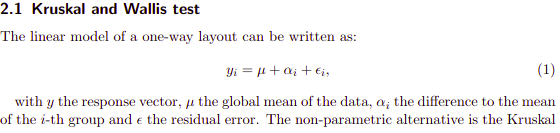  

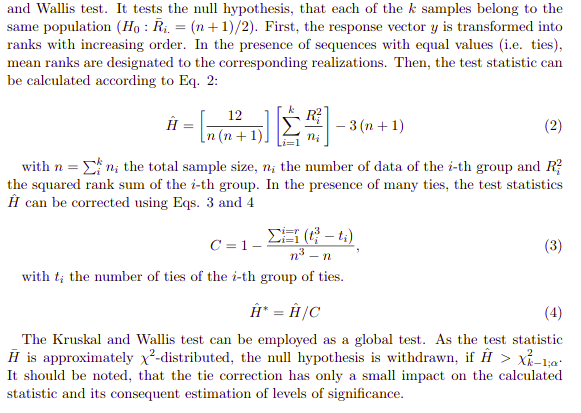

In [102]:
x = [1]
y = [2, 2, 9,7]
z = [2, 2,9,7]

stats.kruskal(x, y, z) 
# No se rechaza que tengan la misma mean o provengan de la misma poblacion

KruskalResult(statistic=2.666666666666665, pvalue=0.26359713811572694)

##  Friedman Test  
Equivalente a la prueba ANOVA para medidas repetidas en la versión no paramétrica, el método consiste en ordenar los datos por filas o bloques, reemplazándolos por su respectivo orden. Al ordenarlos, debemos considerar la existencia de datos idénticos.

Tests whether the distributions of two or more paired samples are equal or not.  

Assumptions  
 
Observations in each sample are independent and identically distributed (iid).  
Observations in each sample can be ranked.  
Observations across each sample are paired.  

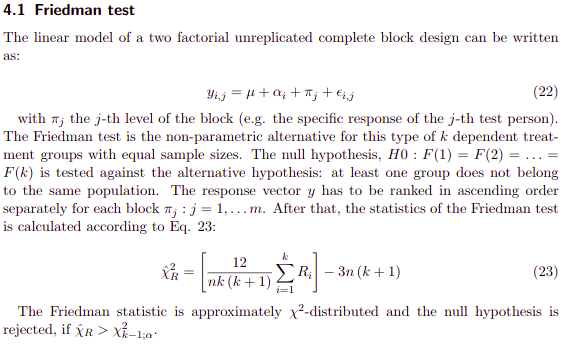
 
 scipy.stats.friedmanchisquare(*args)  
 

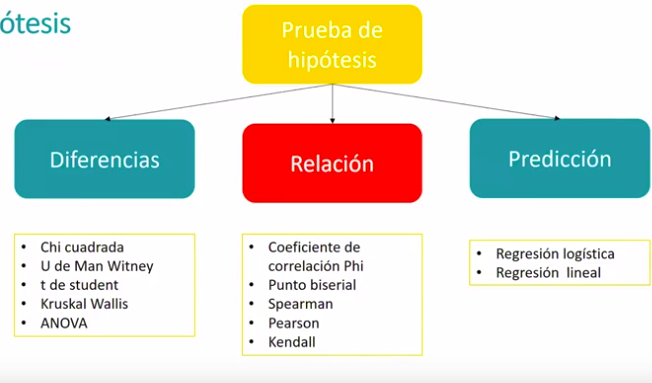

# Post-Hoc test  

chrome-extension://oemmndcbldboiebfnladdacbdfmadadm/https://buildmedia.readthedocs.org/media/pdf/scikit-posthocs/latest/scikit-posthocs.pdf  

https://scikit-posthocs.readthedocs.io/en/latest/    

https://cran.r-project.org/web/packages/PMCMR/vignettes/PMCMR.pdf

Prueba de comparacion por pares usando una prueba estadística como la t de Student produce un aumento del error tipo I que se quiere admitir.  
Las pruebas de comparaciones múltiples corrigen el error para conseguir que no sobrepase el nivel establecido  
Pi-value probabilida de cometer error tipo 1, que es la porbabilidad de rechazar H0 dado que H0 es verdera, es por eso que deseamo que el pi-value sea menor al nivel aplpha  

En Post-hoc test  
H0: meansson iguales, entonces si p-value< alpha, se rechaza que las medianas sean iguales, por lo tanto ahi se encuentra el valor diferente   
The type I error that occurs when each family is compared is called the ‘family-wise error’ (FWE). In other words, the method developed to appropriately adjust the FWE is a multiple comparison method. The α inflation can occur when the same (without adjustment) significant level is applied to the statistical analysis to one and other families simultaneously [2]. For example, if one performs a Student’s t-test between two given groups A and B under 5% α error and significantly indifferent statistical result, the probability of trueness of H0 (the hypothesis that groups A and B are same) is 95%. At this point, let us consider another group called group C, which we want to compare it and groups A and B. If one performs another Student’s t-test between the groups A and B and its result is also nonsignificant, the real probability of a nonsignificant result between A and B, and B and C is 0.95 × 0.95 = 0.9025, 90.25% and, consequently, the testing α error is 1 − 0.9025 = 0.0975, not 0.05. At the same time, if the statistical analysis between groups A and C also has a nonsignificant result, the probability of nonsignificance of all the three pairs (families) is 0.95 × 0.95 × 0.95 = 0.857 and the actual testing α error is 1 − 0.857 = 0.143, which is more than 14%.

##  P value adjustment methods  

###  Bonferrioni  
The Bonferroni method is one of the most commonly used methods to control ‘family-wise error-rate’ (FWER). With an increase in the number of hypotheses tested, type I error increases. Therefore, the significance level is divided into numbers of hypotheses tests. In this manner, type I error can be lowered. In other words, the higher the number of hypotheses to be tested, the more stringent the criterion, the lesser the probability of production of type I errors, and the lower the power.  
For example, for performing 50 t-tests, one would set each t-test to 0.05 / 50 = 0.001. Therefore, one should consider the test as significant only for P < 0.001, not P < 0.05  
The advantage of this method is that the calculation is straightforward and intuitive. However, it is too conservative, since when the number of comparisons increases, the level of significance becomes very small and the power of the system decreases [7]. The Bonferroni correction is strongly recommended for testing a single universal null hypothesis (H0) that all tests are not significant. This is true for the following situations, as well: to avoid type I error or perform many tests without a preplanned hypothesis for the purpose of obtaining significant results [8].  
The Bonferroni correction is suitable when one false positive in a series of tests are an issue. It is usually useful when there are numerous multiple comparisons and one is looking for one or two important ones. However, if one requires many comparisons and items that are considered important, Bonferroni modifications can have a high false negative rate.

###  Sidak  
The Sidak correction isn't used to adjust p-values, it is used to adjust the level of the test. This is done when many simultaneous hypothesis tests are conducted to control the number of false positives, which is likely to be sizable when many tests are conducted. For example, if you do 100 independent hypothesis tests at a α=.05 level then you'd expect to see about 5 positive results even if the null hypothesis was true for every test.  
each null hypotheses is rejected that has a p-value lower than  
$ 1−(1−\alpha)^{1/n} $ 
where n is the number of independent tests and α is the nominal significance level chosen.  
It is less stringent than the Bonferroni correction, but only slightly  

###  Sidak-Holm  
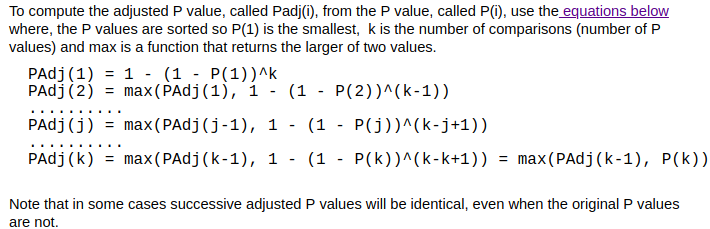

### Holm  
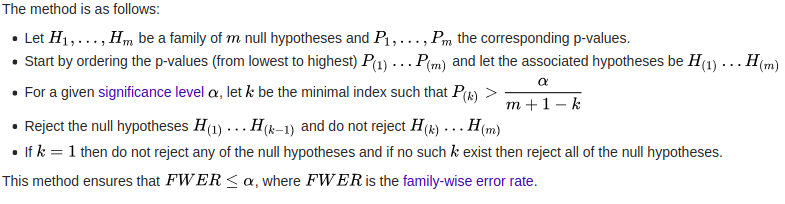

### hommel  
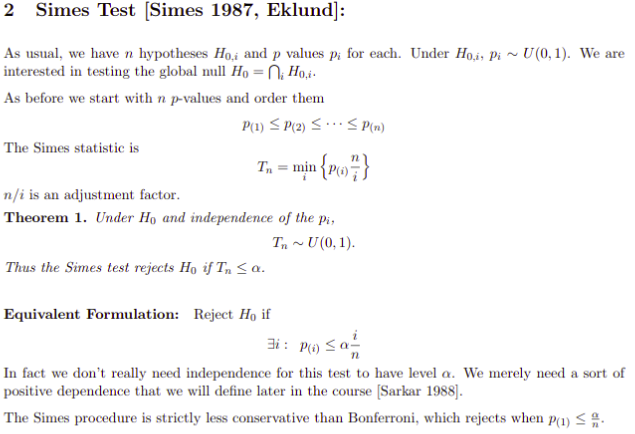  
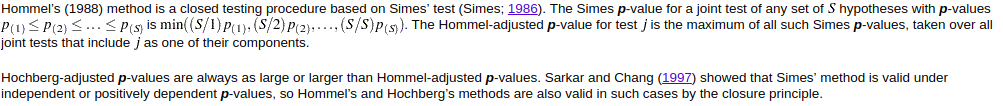  

Hommel's method is more powerful than Hochberg's, but the difference is usually small and the Hochberg p-values are faster to compute.  


###  Benjamini–Hochberg  
control the false discovery rate, the expected proportion of false discoveries amongst the rejected hypotheses. The false discovery rate is a less stringent condition than the family-wise error rate, so these methods are more powerful than the others.  

https://www.statisticshowto.datasciencecentral.com/benjamini-hochberg-procedure/


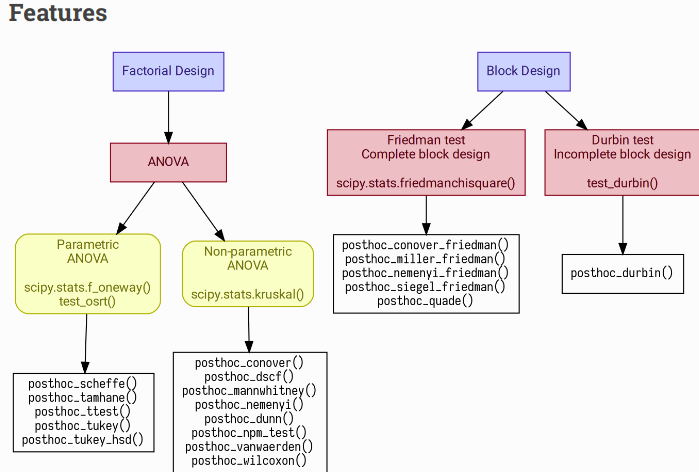

In [103]:
import scikit_posthocs as posthocs

##  Poshoc for parametric ANOVA  
chrome-extension://oemmndcbldboiebfnladdacbdfmadadm/https://cran.r-project.org/web/packages/PMCMR/vignettes/PMCMR.pdf

###   posthoc_scheffe  
Scheffe’s all-pairs comparisons test for normally distributed data with equal group variances. For all-pairs comparisons in an one-factorial layout with normally distributed residuals and equal variances Scheffe’s test can be performed with parametric ANOVA  
A total of m = k(k-1)/2 hypotheses can be tested. 
El Test de Scheffé es un test de comparaciones múltiples. Permite comparar, como los demás contrastes de este tipo, las medias de los t niveles de un factor después de haber rechazado la Hipótesis nula de igualdad de medias mediante la técnica ANOVA.    

 It controls FWER after considering every possible pairwise combination, whereas the Tukey test controls the FWER when only all pairwise comparisons are made.7) This is why the Scheffé’s method is very conservative than other methods and has small power to detect the differences. Since Scheffé’s method generates hypotheses based on all possible comparisons to confirm significance, this method is preferred when theoretical background for differences between groups is unavailable or previous studies have not been completely implemented (exploratory data analysis)

In [104]:
x = pd.DataFrame({"a": [1,2,3,5,1], "b": [12,31,54,62,12], "c": [10,12,6,74,11]})
x=x.melt()
posthocs.posthoc_scheffe(x, val_col='value', group_col='variable')
#Ninguna es estadisticamente significativa, por lo tanto no se rechaza que las medias sean distintas

,a,b,c
a,-1.000000,0.103225,0.359993
b,0.103225,-1.000000,0.700124
c,0.359993,0.700124,-1.000000


In [105]:
x=pd.DataFrame({'a':np.random.normal(size=1000),
            'b':np.random.normal(size=1000),
            'c':np.random.normal(loc=1,scale=2,size=1000)})
x=x.melt()
posthocs.posthoc_scheffe(x, val_col='value', group_col='variable')
#Se rechaza que ac y bc sean iguales

,a,b,c
a,-1.000000e+00,9.158223e-01,2.851242e-56
b,9.158223e-01,-1.000000e+00,1.439718e-53
c,2.851242e-56,1.439718e-53,-1.000000e+00


###  posthoc_tamhane  para despues de Welche´s test (unequal variances)  
Tamhane’s T2 all-pairs comparison test for normally distributed data with unequal variances. Tamhane’s T2 test can be performed for all-pairs comparisons in an one-factorial layout with normally distributed residuals but unequal groups variances. A total of m = k(k-1)/2 hypotheses can be tested. The null hypothesis is tested in the two-tailed test against the alternative hypothesis based on a t test  

Tamhane’s T2 method gives a test statistic using the t-distribution by applying the concept of ‘multiplicative inequality’ introduced by Sidak. Sidak’s multiplicative inequality theorem implies that the probability of occurrence of intersection of each event is more than or equal to the probability of occurrence of each event. Compared to the Games-Howell method, Sidak’s theorem provides a more rigorous multiple comparison method by adjusting the significance level. In other words, it is more conservative than type I error control.

In [106]:
x=pd.DataFrame({'a':np.random.normal(size=1000),
            'b':np.random.normal(size=1000),
            'c':np.random.normal(loc=.5,scale=1.5,size=1000)})
print(stats.levene(x.a,x.b,x.c) )
print(stats.kruskal(x.a,x.b,x.c))
x=x.melt()
posthocs.posthoc_tamhane(x, val_col='value', group_col='variable')

LeveneResult(statistic=97.20787701283064, pvalue=1.2473334119550938e-41)
KruskalResult(statistic=86.91692420659638, pvalue=1.3373026848892987e-19)


,a,b,c
a,-1.000000e+00,0.978079,6.661338e-16
b,9.780794e-01,-1.000000,0.000000e+00
c,6.661338e-16,0.000000,-1.000000e+00


### posthoc_ttest  
Pairwise T test for multiple comparisons of independent groups. May be used after a parametric ANOVA to do pairwise comparisons.  
Revisar el ajuste de p value  

In [107]:
# x=pd.DataFrame({'a':[1,2,3,5,1],'b':[12,31,54, np.nan],'c':[10,12,6,74,11]})
x = [[1,2,3,5,1], [12,31,54, np.nan], [10,12,6,74,11]]
posthocs.posthoc_ttest(x, p_adjust = 'fdr_bh')

array([[-1.        ,  0.04600899,  0.23451817],
       [ 0.04600899, -1.        ,  0.6327077 ],
       [ 0.23451817,  0.6327077 , -1.        ]])

###  posthoc_tukey  
Performs Tukey’s all-pairs comparisons test for normally distributed data with equal group variances. For all-pairs comparisons in an one-factorial layout with normally distributed residuals and equal variances Tukey’s test can be performed. A total of m = k(k-1)/2 hypotheses can be tested. The null hypothesis is tested in the two-tailed test against the alternative hypothesis  
es una prueba estadísticautilizada general yconjuntamente con ANOVA, La prueba Tukey se usa en experimentos que implican un número elevado de comparaciones.  
Es defácil cálculo puesto que se define un solo comparador, resultante del producto del error estándar de la media por el valor tabular en la tabla de Tukey usando como numerador el número de tratamientos y como denominador los grados de libertad delerror  
Seconoce como Tukey-Kramer cuando las muestras no tienen el mismo número de datos  
• Dado que el análisis de varianza acuse un efecto significativo, la prueba de Tukey provee un nivel de significancia global de α cuando los tamaños de las muestras son iguales y de α a lo sumo a cuando no son iguales

In [108]:
x = pd.DataFrame({"a": [1,2,3,4,5], "b": [35,31,75,40,21], "c": [10,6,9,6,1]})
print(stats.levene(x.a,x.b,x.c) )
print(stats.shapiro(x.a),stats.shapiro(x.b),stats.shapiro(x.c))
print(stats.f_oneway(x.a,x.b,x.c))
x = x.melt(var_name='groups', value_name='values')
posthocs.posthoc_tukey(x, val_col='values', group_col='groups')

LeveneResult(statistic=2.2061469265367317, pvalue=0.15278185238673614)
(0.9867621660232544, 0.9671739339828491) (0.8566544055938721, 0.21648362278938293) (0.9139877557754517, 0.49192139506340027)
F_onewayResult(statistic=14.661334552102378, pvalue=0.0005997320835438976)


,a,b,c
a,-1.000,0.001000,0.900000
b,0.001,-1.000000,0.002101
c,0.900,0.002101,-1.000000


###  posthoc_turkey_hsd  
This test uses pairwise post-hoc testing to determine whether there is a difference between the mean of all possible pairs using a studentized range distribution. This method tests every possible pair of all groups. Initially, the Tukey test was called the ‘Honestly significant difference’ test, or simply the ‘T test,’4) because this method was based on the t-distribution. It is noted that the Tukey test is based on the same sample counts between groups (balanced data) as ANOVA. Subsequently, Kramer modified this method to apply it on unbalanced data, and it became known as the Tukey-Kramer test. This method uses the harmonic mean of the cell size of the two comparisons. The statistical assumptions of ANOVA should be applied to the Tukey method, as well.  

DataFrame with 0, 1, and -1 values, where 0 is False (not significant), 1 is True (significant), and -1 is for diagonal elements.  


In [109]:
>>> x = [[1,2,3,4,5], [35,31,75,40,21], [10,6,9,6,1]]
>>> g = [['a'] * 5, ['b'] * 5, ['c'] * 5]
>>> posthocs.posthoc_tukey_hsd(np.concatenate(x), np.concatenate(g))

,a,b,c
a,-1,1,0
b,1,-1,1
c,0,1,-1


##  Poshoc for non parametric ANOVA kruskal

###  posthoc_conover  
Post hoc pairwise test for multiple comparisons of mean rank sums (Conover’s test). May be used after Kruskal-Wallis one-way analysis of variance by ranks to do pairwise comparisons  
The Conover-Iman test likewise preserves the ranks that the Kruskal-Wallis uses, and uses a pooled variance estimate to construct post hoc t test statistics. This test is valid if and only if you reject the Kruskal-Wallis test, but provides much greater power to reject than Dunn's test.   
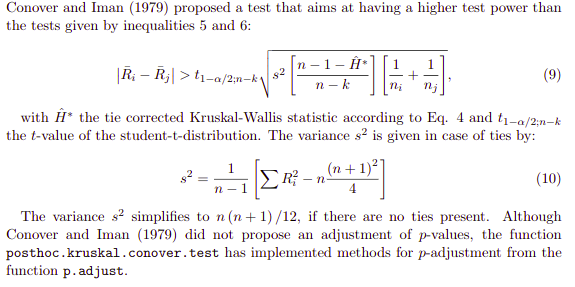

In [110]:
>>> x = [[1,2,3,5,1], [12,31,54, np.nan,5], [10,12,6,74,11]]
>>> posthocs.posthoc_conover(x, p_adjust = 'holm')

,1,2,3
1,-1.000000,0.001163,0.001163
2,0.001163,-1.000000,0.714722
3,0.001163,0.714722,-1.000000


In [111]:
x =pd.DataFrame({'a':[1,2,3,5,1],'b': [12,31,54, np.nan,5],'c': [10,12,6,74,11]})
x=x.melt()
posthocs.posthoc_conover(x, val_col='value', group_col='variable',p_adjust='fdr_bh')

,a,b,c
a,-1.000000,0.000692,0.000692
b,0.000692,-1.000000,0.714722
c,0.000692,0.714722,-1.000000


###   posthoc_dscf  
Dwass, Steel, Critchlow and Fligner all-pairs comparison test for a one-factorial layout with non-normally distributed residuals. As opposed to the all-pairs comparison procedures that depend on Kruskal ranks, the DSCF test is basically an extension of the U-test as re-ranking is conducted for each pairwise test

In [112]:
>>> import scikit_posthocs as sp
>>> import pandas as pd
>>> x = pd.DataFrame({"a": [1,2,3,5,1], "b": [12,31,54,62,12], "c": [10,12,6,74,11]})
>>> x = x.melt(var_name='groups', value_name='values')
>>> sp.posthoc_dscf(x, val_col='values', group_col='groups')

,a,b,c
a,-1.000000,0.023413,0.023950
b,0.023413,-1.000000,0.355236
c,0.023950,0.355236,-1.000000


###  posthoc_Mann-Whitney  
Pairwise comparisons with Mann-Whitney rank test.  

In [113]:
>>> x = [[1,2,3,4,5], [35,31,75,40,21], [10,6,9,6,1]]
>>> print(sp.posthoc_mannwhitney(x, p_adjust = 'holm'))

          1         2         3
1 -1.000000  0.035776  0.114961
2  0.035776 -1.000000  0.035776
3  0.114961  0.035776 -1.000000


### posthoc_nemenyi  
Same as Tukey for ANOVA but this is for Kruskall where the va are not normally distributed   
ost hoc pairwise test for multiple comparisons of mean rank sums (Nemenyi’s test). May be used after Kruskal-Wallis one-way analysis of variance by ranks to do pairwise comparisons 

In [114]:
>>> x = [[1,2,3,5,1], [12,31,54, np.nan], [10,12,6,74,11]]
>>> sp.posthoc_nemenyi(x)

,1,2,3
1,-1.000000,0.036820,0.097202
2,0.036820,-1.000000,0.782794
3,0.097202,0.782794,-1.000000


###  posthoc_dunn  
Post hoc pairwise test for multiple comparisons of mean rank sums (Dunn’s test). May be used after Kruskal-Wallis one-way analysis of variance by ranks to do pairwise comparisons   

When some of the assumptions of analysis of variance are violated and number of groups is small, use of stepwise Steel-Dwass procedure with Holm's approach is appropriate to control type I error at a desired level. Dunn's method should be employed for greater number of groups. When subgroups are unbalanced and number of groups is small, Nemenyi's procedure with Duncan's approach produces high power values. Conover's procedure successfully provides high power values with a small number of unbalanced groups or with a greater number of balanced or unbalanced groups. At the same time, Conover's procedure is unable to control type I error rates.  

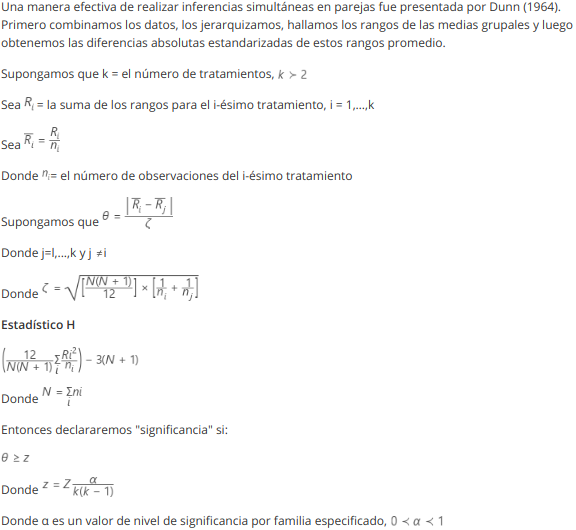

In [115]:
>>> x = [[1,2,3,5,1], [12,31,54, np.nan], [10,12,6,74,11]]
>>> sp.posthoc_dunn(x, p_adjust = 'holm')

,1,2,3
1,-1.000000,0.030535,0.061677
2,0.030535,-1.000000,0.484029
3,0.061677,0.484029,-1.000000


###  posthoc_npm  
Calculate pairwise comparisons using Nashimoto and Wright’s all-pairs comparison procedure (NPM test) for simply ordered mean ranksums.  
NPM test is basically an extension of Nemenyi’s procedure for testing increasingly ordered alternatives  


In [116]:
>>> x = np.array([[102,109,114,120,124],
                  [110,112,123,130,145],
                  [132,141,156,160,172]])
>>> sp.posthoc_npm_test(x)

,1,2,3
1,-1.0,0.9,0.9
2,0.9,-1.0,0.9
3,0.9,0.9,-1.0


###  posthoc_vanderwearden  
Van der Waerden’s test for pairwise multiple comparisons between group levels.  
k population distribution functions are equal. The Van der Waerden test converts the ranks from a standard Kruskal-Wallis one-way analysis of variance to quantiles of the standard normal distribution (details given below). These are called normal scores and the test is computed from these normal scores.  
For one-factorial designs with samples that do not meet the assumptions for one-way-ANOVA and subsequent post hoc tests, the van der Waerden test using normal scores can be employed. Provided that significant differences were detected by this global test, one may be interested in applying post hoc tests according to van der Waerden for pairwise multiple comparisons of the group levels.  
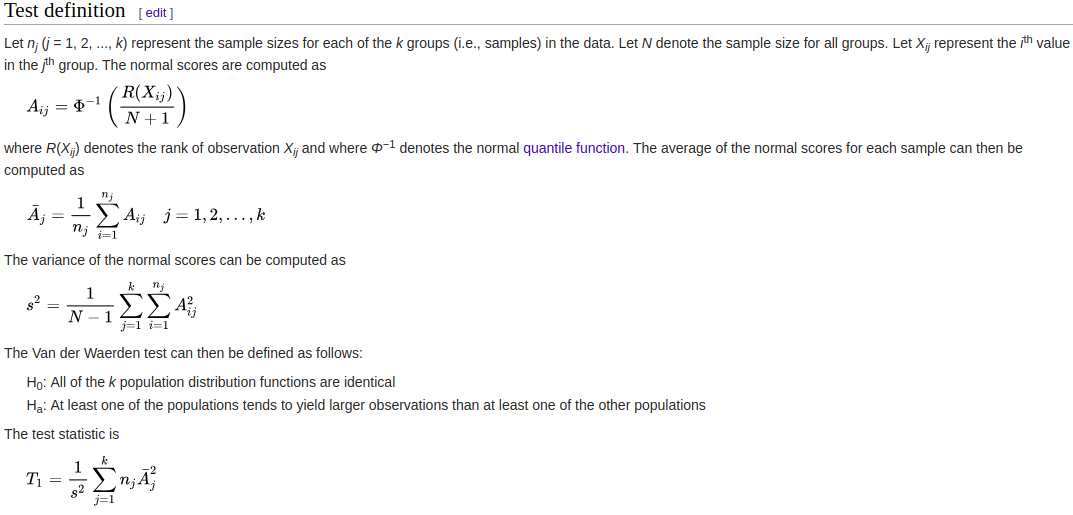  

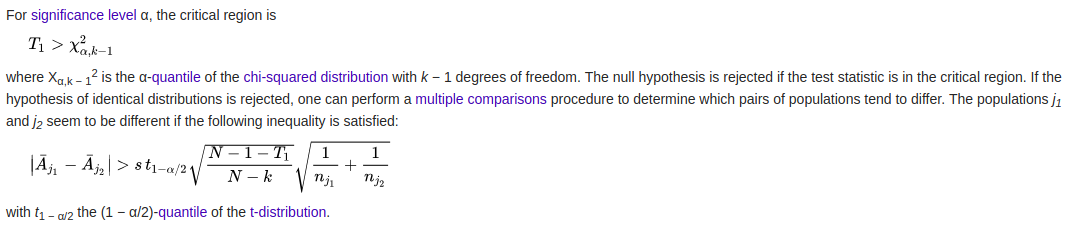

In [117]:
>>> x = np.array([[10,'a'], [59,'a'], [76,'b'], [10, 'b']])
>>> sp.posthoc_vanwaerden(x, val_col = 0, group_col = 1)

,a,b
a,-1.000000,0.744177
b,0.744177,-1.000000


###  posthoc_wilcoxon  
Pairwise comparisons with Wilcoxon signed-rank test. It is a non-parametric version of the paired T-test for use with non-parametric ANOVA.  

In [118]:
>>> x = [[1,2,3,4,5], [35,31,75,40,21], [10,6,9,6,1]]
>>> sp.posthoc_wilcoxon(x)

C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,1,2,3
1,-1.000000,0.043114,0.175554
2,0.043114,-1.000000,0.042168
3,0.175554,0.042168,-1.000000


##  Poshoc for non parametric ANOVA  Friedman

###  posthoc_friedman_conover  
Calculate pairwise comparisons using Conover post hoc test for unreplicated blocked data. This test is usually conducted post hoc after significant results of the Friedman test. The statistics refer to the Student t distribution  
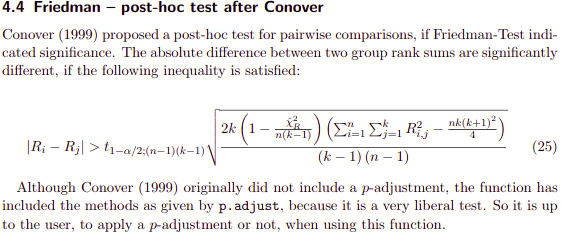

In [119]:
>>> x = np.array([[31,27,24],[31,28,31],[45,29,46],[21,18,48],[42,36,46],[32,17,40]])
>>> sp.posthoc_conover_friedman(x)

,0,1,2
0,-1.000000,0.083101,0.566769
1,0.083101,-1.000000,0.030519
2,0.566769,0.030519,-1.000000


### posthoc_friedman_nemenyi  
Calculate pairwise comparisons using Nemenyi post hoc test for unreplicated blocked data. This test is usually conducted post hoc if significant results of the Friedman’s test are obtained. The statistics refer to upper quantiles of the studentized range distribution (Tukey)  
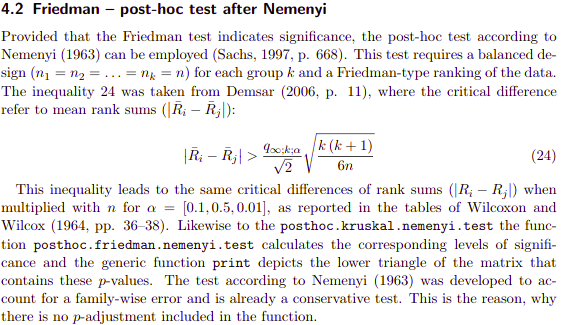

In [120]:
>>> # Non-melted case, x is a block design matrix, i.e. rows are blocks
>>> # and columns are groups.
>>> x = np.array([[31,27,24],[31,28,31],[45,29,46],[21,18,48],[42,36,46],[32,17,40]])
>>> sp.posthoc_nemenyi_friedman(x)

,0,1,2
0,-1.000000,0.145624,0.813237
1,0.145624,-1.000000,0.037622
2,0.813237,0.037622,-1.000000


###  posthoc_quade  
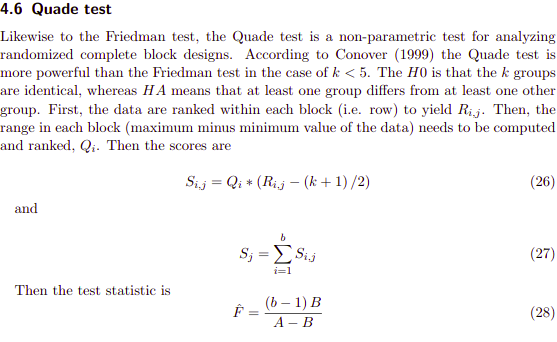  

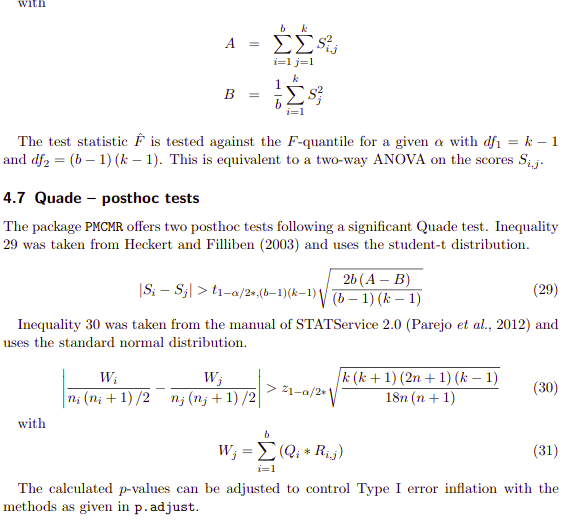  

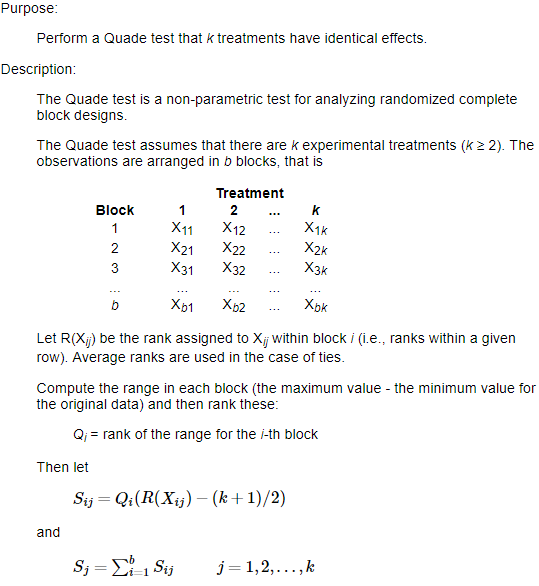  

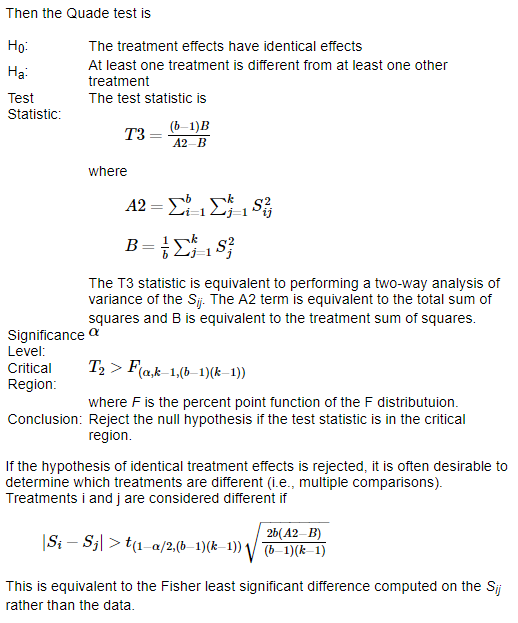  



Calculate pairwise comparisons using Quade’s post hoc test for unreplicated blocked data. This test is usually conducted if significant results were obtained by the omnibus test  

An array, any object exposing the array interface or a pandas DataFrame.  
If melted is set to False (default), a is a typical matrix of block design, i.e. rows are blocks, and columns are groups. In this case you do not need to specify col arguments.

In [121]:
x = np.array([[31,27,24],[31,28,31],[45,29,46],[21,18,48],[42,36,46],[32,17,40]])
sp.posthoc_quade(x) 
#3 porque son el numero de columnas, cuando se pasa un array toma el numero de columnas como los grupos y las filas como bloques

,0,1,2
0,-1.000000,0.046764,0.170580
1,0.046764,-1.000000,0.003821
2,0.170580,0.003821,-1.000000


##  Durbin test

### https://en.wikipedia.org/wiki/Durbin_test  

###  Balanced Incomplete Block Design  
This module generates balanced incomplete block designs. Designs for up to ten treatments are available.  
In order to make precise measurements of treatment means, uniform experimental conditions should be
maintained when comparing a number of treatments. This insures that differences among the treatment means
result from the application of the treatment and not from some extraneous factor. To achieve this, experimental
trials are often grouped together into blocks. In such designs, conditions are kept constant within the blocks and
allowed to vary between the blocks. The best known design of this type is the randomized block design. In this
design, all treatments are present in each block.  
Occasionally, the size of convenient blocks will not accommodate all the treatments of interest. For example,
suppose you wanted to test four types of automobile tires for wear. An obvious choice for a block would be an
automobile. You might select ten automobiles for the study. Assuming that the tires were rotated among the four
positions, this experiment would control for differences in tire wear due to the type of automobile and the terrain
that each traveled. However, what would you do if you wanted to test six types of tires. You could redesign the
automobile, or you could adopt a balanced incomplete block design.  
In a balanced incomplete block design, the treatments are assigned to the blocks so that every pair of treatments
occurs together in a block the same number of times. This achieves the balance that is described in the title of the
procedure. The balance means that all differences between treatments are measured with equal precision.   

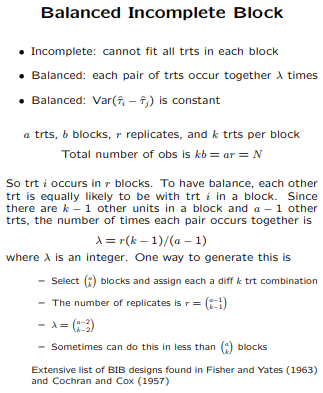  

a>k, si a=k, entonces Balanced Complete Block Design

In [122]:
x = np.array([[31,27,24],[31,28,31],[45,29,46],[21,18,48],[42,36,46],[32,17,40]])
sp.posthoc_durbin(x)

,0,1,2
0,-1.000000,0.023252,0.429487
1,0.023252,-1.000000,0.005732
2,0.429487,0.005732,-1.000000


###  posthoc_anderson  
Anderson-Darling Pairwise Test for k-samples. Tests the null hypothesis that k-samples are drawn from the same population without having to specify the distribution function of that population  
array de 3 o mas muestras

In [124]:
x=np.array([np.random.normal(size=1000).tolist(),
            np.random.normal(size=1000).tolist(),
            np.random.normal(loc=1,scale=2,size=1000).tolist()])
posthocs.posthoc_anderson(x)

C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\scikit_posthocs\_posthocs.py:1265: UserWarning: p-value capped: true value larger than 0.25
  vs[i, j] = ss.anderson_ksamp([x.loc[x[_group_col] == groups[i], _val_col], x.loc[x[_group_col] == groups[j], _val_col]], midrank=midrank)[2]
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\scikit_posthocs\_posthocs.py:1265: UserWarning: p-value floored: true value smaller than 0.001
  vs[i, j] = ss.anderson_ksamp([x.loc[x[_group_col] == groups[i], _val_col], x.loc[x[_group_col] == groups[j], _val_col]], midrank=midrank)[2]
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\scikit_posthocs\_posthocs.py:1265: UserWarning: p-value floored: true value smaller than 0.001
  vs[i, j] = ss.anderson_ksamp([x.loc[x[_group_col] == groups[i], _val_col], x.loc[x[_group_col] == groups[j], _val_col]], midrank=midrank)[2]


,1,2,3
1,-1.000,0.250,0.001
2,0.250,-1.000,0.001
3,0.001,0.001,-1.000


In [ ]:

# VARMAX example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
v1 = random()
v2 = v1 + random()
row = [v1, v2]
data.append(row)
data_exog = [x + random() for x in range(100)]
# fit model
model = VARMAX(data, exog=data_exog, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
data_exog2 = [[100]]
yhat = model_fit.forecast(exog=data_exog2)
print(yhat)


In [2]:
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
data_exog = [x + random() for x in range(100)]

In [6]:
model = VARMAX(data, exog=data_exog, order=(1, 1))
model_fit = model.fit(disp=False)

C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\statsmodels\tsa\statespace\varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\charl\Anaconda3\envs\Multivariado\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [7]:
data_exog2 = [[100]]

In [13]:
yhat = model_fit.forecast(steps=10)

ValueError: Out-of-sample forecasting in a model with a regression component requires additional exogenous values via the `exog` argument.

In [10]:
yhat

array([[0.41740387, 0.94727962]])